Operate the values in the list based on the operator condition

In [31]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
import numpy as np

In [32]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: str

In [33]:
def operator(state: AgentState) -> AgentState:
    """ Operator to operate the list of values based on the operation condition """
    print(state)
    if state["operation"] == "*":
        ans = np.prod(state["values"])
    else:
        ans = np.sum(state["values"])
    state["result"] = f"Hi {state["name"]}, your answer is {ans}"
    print(state)

    return state

In [34]:
graph = StateGraph(AgentState)
graph.add_node(node="operate", action=operator)
graph.set_entry_point(key="operate")
graph.set_finish_point(key="operate")
app = graph.compile()

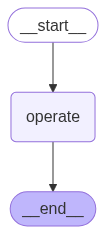

In [35]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [38]:
answer = app.invoke({
    "name": "Jack Sparrow",
    "values": [1,2,3,4,5],
    "operation": "*"
})
answer["result"]

{'name': 'Jack Sparrow', 'values': [1, 2, 3, 4, 5], 'operation': '*'}
{'name': 'Jack Sparrow', 'values': [1, 2, 3, 4, 5], 'operation': '*', 'result': 'Hi Jack Sparrow, your answer is 120'}


'Hi Jack Sparrow, your answer is 120'